<a href="https://colab.research.google.com/github/rilschultz/CS167Notes/blob/main/Day08_Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS167: Day08
## Decision Trees

#### CS167: Machine Learning, Spring 2023

Tuesday, February 21st, 2023

📆 [Course Schedule](https://docs.google.com/spreadsheets/d/e/2PACX-1vSvFV5Mz0_YZE1d5r3gQ8IMktE4cBAsJIlP30cl2GhEpSO0J-YWV62QokSDz-OcOCsEmxMuKpY0kVlR/pubhtml?gid=0&single=true) | 🙋[PollEverywhere](https://pollev.com/meredithmoore011) | 📜 [Syllabus](https://analytics.drake.edu/~moore/cs167_s23_syllabus.html) | 📬 [CodePost Login](https://codepost.io/login)

# Admin Stuff

You should be working on:
- Heads up that **Quiz #1 is due tonight, Tuesday 2/21 by 11:59pm**.
    - To be completed individually
    - Only one chance to hit 'submit'
    - Cite any materials that you use outside of class
- [Notebook #3](https://classroom.github.com/a/2Jc4k7Pe) is due Thursday 2/23/23 by 11:59pm.

# This week overview:

**Today**: Introduction to Decision Trees:
- Office hours added today from 2:00 - 3:00.

**Thursday**: Decision Trees Part II (asynchronous)
- lecture will be posted by class time, please watch it and take the associated Blackboard quiz for participation points.

# Disclaimer ⚠️

# Can't forget to add our data/libraries:

In [1]:
#run this cell if you're using Colab:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#import the data:
#make sure the path on the line below corresponds to the path where you put your dataset.
import pandas as pd
import numpy as np
path = '/content/drive/MyDrive/datasets/irisData.csv'
iris= pd.read_csv(path)
iris.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Quick Review:


# Remember our kNN function?

In [3]:
def kNN(specimen, data, k):
    # write your code in here to make this function work
    # 1. calculate distances
    data['distance_to_new'] = np.sqrt(
    (specimen['petal length'] - data['petal length'])**2 
    +(specimen['sepal length'] - data['sepal length'])**2 
    +(specimen['petal width'] - data['petal width'])**2
    +(specimen['sepal width'] - data['sepal width'])**2)

    # 2. sort
    data.sort_values(['distance_to_new'], inplace=True)
    
    # 3. predict
    prediction = data.iloc[0:k]['species'].mode()

    return prediction.iloc[0]

In [4]:
new_iris = {}
new_iris['petal length'] = 5.1
new_iris['sepal length'] = 7.2
new_iris['petal width'] = 1.5
new_iris['sepal width'] = 2.5

kNN(new_iris, iris, 3)

'Iris-versicolor'

# Where we left off: 

## Let's see how accurate our kNN model is:

Start with loading the data and setting up some cross-validation:

In [6]:
import pandas
path = '/content/drive/MyDrive/datasets/irisData.csv'
#change this line to point to your data
data = pandas.read_csv(path) 
#shuffle the data - "sampling" the full set in random order
shuffled_data = data.sample(frac=1, random_state=41)

#cross-validation
#use the first 20 rows in the shuffled set as testing data #train with the rest
test_data = shuffled_data.iloc[0:20]
train_data = shuffled_data.iloc[20:]

Then, let's bring in our `kNN()` function--here I'm calling it `classify_kNN()` becuase it uses `mode()` to return the prediction which only works for classifcation.

In [7]:
def classify_kNN(new_example,train_data,k):
    #getting a copy of the training set just so we don't
    #mess up the original
    train_data_copy = train_data.copy()
    train_data_copy['distance_to_new'] = numpy.sqrt(
        (new_example['petal length']-train_data_copy['petal length'])**2
        +(new_example['sepal length']-train_data_copy['sepal length'])**2
        +(new_example['petal width']-train_data_copy['petal width'])**2
        +(new_example['sepal width']-train_data_copy['sepal width'])**2)
    
    sorted_data = train_data_copy.sort_values(['distance_to_new'])
    #mode to get most common thing in the first k examples in the sorted dataframe
    #iloc to get the actual string, mode will return the string inside of a pandas Series
    prediction = sorted_data.iloc[0:k]['species'].mode().iloc[0] 
    return prediction

Now, let's write a function `classify_all_kNN(test_data, train_data,k):` that:
- goes through each example in the `test_data`, and gets the prediction using our `kNN()` function
- It will return a pandas `Series` that has the predictions for each row in `test_data`.

It should look something like this:

In [8]:
def classify_all_kNN(test_data,train_data,k):
    #apply the classify_kNN function to each item in the test data with the train
    #data and k passed as the other two arguments. The result will be a series of 
    #the individual results.
    
    results = []
    
    for i in range(len(test_data)):
        prediction = classify_kNN(test_data.iloc[i], train_data,k)
        results.append(prediction)
    
    return pandas.Series(results)

Now, let's pull it all together and see how our kNN does:

In [9]:
import numpy
from sklearn.metrics import accuracy_score

predictions5NN = classify_all_kNN(test_data,train_data,11)


#this will print out our predictions so we can see:
print('ACTUAL\t\tPREDICTIONS')
for i in range(20):
    print(test_data['species'].iloc[i], "  ", predictions5NN.iloc[i] )

#acc = accuracy(test_data['species'],predictions5NN)

acc = accuracy_score(test_data['species'], predictions5NN)
print("accuracy:", acc)

ACTUAL		PREDICTIONS
Iris-virginica    Iris-virginica
Iris-virginica    Iris-virginica
Iris-virginica    Iris-virginica
Iris-versicolor    Iris-versicolor
Iris-virginica    Iris-virginica
Iris-versicolor    Iris-versicolor
Iris-virginica    Iris-virginica
Iris-versicolor    Iris-versicolor
Iris-virginica    Iris-virginica
Iris-virginica    Iris-virginica
Iris-virginica    Iris-virginica
Iris-setosa    Iris-setosa
Iris-setosa    Iris-setosa
Iris-versicolor    Iris-versicolor
Iris-setosa    Iris-setosa
Iris-virginica    Iris-virginica
Iris-setosa    Iris-setosa
Iris-versicolor    Iris-virginica
Iris-setosa    Iris-setosa
Iris-setosa    Iris-setosa
accuracy: 0.95


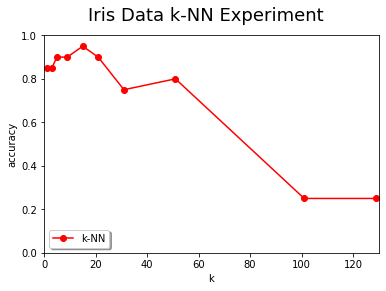

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas

path = '/content/drive/MyDrive/datasets/irisData.csv'


#reload the data
data = pandas.read_csv(path)

shuffled_data = data.sample(frac=1, random_state = 41)

test_data = shuffled_data.iloc[0:20]
train_data = shuffled_data.iloc[20:]


k_vals = [1,3,5,9,15,21,31,51,101,129] #130 rows in training set
kNN_accuracies = []

for k in k_vals:
    predictions = classify_all_kNN(test_data,train_data,k)
    current_accuracy = accuracy_score(test_data['species'],predictions)
    kNN_accuracies.append(current_accuracy)


plt.suptitle('Iris Data k-NN Experiment',fontsize=18)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(k_vals,kNN_accuracies,'ro-',label='k-NN')
plt.legend(loc='lower left', shadow=True)
plt.axis([0,130,0,1])

plt.show()

## Cross-Validation Metrics:

When doing cross-validation, how do we tell how well our model performed?

How can we measure it?

| **Type of ML** | **Metric**                | **Description**                                                                                              |
|----------------|---------------------------|:--------------------------------------------------------------------------------------------------------------|
| Classification | Accuracy                  | Number correct examples divided by total number                                                              |
| Classification | Confusion Matrix          | Detailed table of where our model got confused. |
| Regression     | Mean Absolute Error (MAE) | The average absolute distance from the target variable                                                       |
| Regression     | Mean Squared Error (MSE)  | The average squared distance from the target variable                                                        |
| Regression     | $R^2$                     | 1: perfectly fit data<br>0: same performance as guessing the mean of the target variable<br>-1: really bad.  |

#  🙋 Poll Everywhere Review Question:

## 💬 Group Exercise:

Write a function that takes in two Series and returns the Mean Absolute Error:

__Mean Absolute Error (MAE)__: the average difference between the actual and predicted target values. 

<div>
<img src="https://github.com/merriekay/S23-CS167-Notes/blob/main/images/day04_mae.png?raw=1", width=400/>
</div>

> How can you test your code to make sure it's working correctly?


In [13]:
import numpy as np
np.absolute(-19)

19

In [19]:
def mae(actual, predicted):
    """
    takes in two Series of the same length, and returns the mean absolute error between the two series
    Hint: It's a lot simpler than you may think. 
    """
    mean_absolute_error = np.absolute(actual - predicted).mean()
    
    return mean_absolute_error
    
series1 = pd.Series([1, 2, 3, 4, 6])
series2 = pd.Series([1, 2, 3, 4, 6])

print(mae(series1, series2))

0.0


# [Notebook #3: Wine Quality 🍷](https://classroom.github.com/a/2Jc4k7Pe)

Wines are typically rated (scored) on a range from 0-10.

Is there anything scientific or predictable to wine ratings?

Given measurable qualities of wine, can they predict the rating.

If I meaure, say 1600 white wines for alcohol, pH, citric acid, sulphates, etc, and then am given some random wine, can we _predict_ it's rating?

In [20]:
import pandas as pd
import numpy as np
path = '/content/drive/MyDrive/datasets/winequality-white.csv'
wine= pd.read_csv(path)
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Exercise #1

1. Implement mean squared error (mse) algorithm and test it:

In [ ]:
def mse(actual, predicted):
    """
    Input: 
        actual, a list of values
        predicted, a list of values
        (assume actual and predicted are the same len)
    Output: 
        the mean squared error between the actual and predicted values
    """
    print("Your code goes here")

## Exercise #2

2. Implement cross validation--create training and testing data. Use approximately the first 320 rows in the shuffled set as testing data. 

In [ ]:
wine_data = pd.read_csv('/content/drive/MyDrive/CS167/datasets/winequality-white.csv')

#establish test_data and train_data here

## Exercise #3

3. Use the kNN implementation and the other code provided below to normalize your data. Test your model using several different values of k and __graphically show__ the results using your implmentation of __MSE__. 

## Exercise #4

4. Repeat the experiment and __graphically show the results__ using __$R^2$__. 

## Exercise #5

5. Describe your findings. What conclusions can you draw about the best number for k for the kNN algorithm for this dataset? __Explain why__. Use a markdown cell to explain your conclusions. 

# ✨ New Material: 

# Decision Trees 🌳

### What is a tree in computer science?

__Tree__: a common data structure that simulates a hierarchical tree structure, with a root value and subtrees of children with a parent node, represented as a set of liked nodes. 

Where is a common place we interact with a tree datastructue on a daily basis?

<div>
<img src="https://github.com/merriekay/S23-CS167-Notes/blob/main/images/day05_decision_tree.png?raw=1" width=250/>
</div>

## What is a decision tree?
<div>
<img src="https://github.com/merriekay/S23-CS167-Notes/blob/main/images/day05_dt_ex1.png?raw=1" width=800/>
</div>

## What is a decision tree?
<div>
<img src="https://github.com/merriekay/S23-CS167-Notes/blob/main/images/day05_dt_ex2.png?raw=1" width=900/>
</div>

# Decision Tree Examples

We're going to switch to Google Slides here: [Decision Tree Example Slides](https://docs.google.com/presentation/d/1mQxycmE2gjC5i-Iwphpd_KAsaFxVDzJXkg_C2EBFGUQ/edit?usp=sharing)

In [ ]:
from IPython.display import IFrame
IFrame("https://analytics.drake.edu/~moore/Day05_Decision_Trees.pdf", 1200,800)

## 🚨 Terminology Alert 🚨: `consistent` and `generalize`

Is this tree __consistent__ with the training examples?
- do all of the training examples get categorized appropriately?

Will this tree __generalize__ well to new examples?
- how well will new examples (test set) perform?

## Great, now how do I build (grow) a tree?

One algorithm that builds a decision tree is called the __ID3 Decision Tree Learning Algorithm__.

It goes like this: 
    
__Main ID3 Loop__:
1. Assign A to be the _best_ decision feature for the next node.
2. Assign A as decision feature for the node
3. For each possible attribute of A, create a new descendant of node
4. Sort training examples to leaf nodes
5. If Training examples are perfectly classified, the STOP, Else, iterate over new leaf nodes.

### What does 'best' mean? How can we tell which node is *best*?

## Selecting a feature: Polleverywhere

<div>
<img src="https://github.com/merriekay/S23-CS167-Notes/blob/main/images/day05_selecting_feature.png?raw=1" width=600/>
</div>

## Selecting a feature:
__idea__: a good feature splits the examples into __subsets that are as pure as possible__ (ideally) 'all positive' or 'all negative'

> patrons is a better choice--it gives more information about the classification.

## 🚨 Terminology Alert 🚨 `entropy`

__Entropy__: measure of impurity/randomness
- __high entropy__: more evenly split classes - highly unpredictable
- __low entropy__: mostly one class - highly predictable

<div>
<img src="https://github.com/merriekay/S23-CS167-Notes/blob/main/images/day05_entropy.png?raw=1" width=600/>
</div>

## Calculating Entropy Prior

__Prior Probability__:aka the 'prior'
- the split of the examples
- if I have 9 positive examples and 5 negative examples, my prior is:

$\langle 9/14, 5/14 \rangle \approx \langle 0.64, 0.36 \rangle$
> the prior probabilities must sum to 1

## Calculating Entropy:

Calculating the entropy when prior is $\langle P_1, ..., P_c\rangle$

<div>
<img src="https://github.com/merriekay/S23-CS167-Notes/blob/main/images/day05_entropy_calc.png?raw=1" width=600/>
</div>

- entropy of prior $\langle 0.5, 0.5 \rangle$ is $-0.5 \log_{2}(0.5) -0.5 \log_{2}(0.5)  = 1$

- entropy of prior $\langle 0.9, 0.1 \rangle$ is $-0.9 \log_{2}(0.9)-0.1 \log_{2}(0.1) \approx 0.47$

- entropy of prior $\langle 0.64, 0.36 \rangle$ is $-0.64 \log_{2}(0.64)-0.36 \log_{2}(0.36) \approx 0.94$

- entropy of prior $\langle 0.25, 0.25, 0.5 \rangle$ is $-0.25 \log_{2}(0.25)-0.25 \log_{2}(0.25)-0.5 \log_{2}(0.5) \approx 1.5 $

> The maximum entropy is $\log_{2}(k)$ where $k$ is the number of categories. It is not always bounded by 0 and 1

In [ ]:
import math
math.log(3, 2) # log base 2 of 3

1.5849625007211563

## Code for Entropy:

In [ ]:
import math
# here's the syntax for a log(Base 2)
for i in [.5,1,2,4,8,16,32,64]:
    print("log base 2 of", i, "is", math.log2(i))

log base 2 of 0.5 is -1.0
log base 2 of 1 is 0.0
log base 2 of 2 is 1.0
log base 2 of 4 is 2.0
log base 2 of 8 is 3.0
log base 2 of 16 is 4.0
log base 2 of 32 is 5.0
log base 2 of 64 is 6.0


In [ ]:
import math
def entropy(percentage_list):
    #input: percentage_list consists of float values that sum to 1.0 
    #return: calculation of entropy for input percentages
    result = 0
    for percentage in percentage_list:
        if percentage != 0:
            result += -percentage*math.log2(percentage)
    return result

In [ ]:
#example of a calculation of entropy
entropy([2/6,4/6])

0.9182958340544896

In [ ]:
entropy([1/4, 1/4, 2/4])

1.5

In [ ]:
import pandas
import numpy
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
path = 'datasets/restaurant.csv'  #'/content/drive/MyDrive/CS167/Datasets/restaurant.csv'
restaurant = pd.read_csv(path)

restaurant.head()

,alt,bar,fri,hun,pat,price,rain,res,type,est,target
0,Yes,No,No,Yes,Some,$$$,No,Yes,French,0-10,Yes
1,Yes,No,No,Yes,Full,$,No,No,Thai,30-60,No
2,No,Yes,No,No,Some,$,No,No,Burger,0-10,Yes
3,Yes,No,Yes,Yes,Full,$,No,No,Thai,10-30,Yes
4,Yes,No,Yes,No,Full,$$$,No,Yes,French,>60,No


## Example: Step 1

Start by calculating the entropy of the example __before__ picking a feature:
- $\langle 0.5, 0.5 \rangle = 1$
<div>
<img src="https://github.com/merriekay/S23-CS167-Notes/blob/main/images/day05_patrons_entropy.png?raw=1" width=600/>
</div>

## Example: Step 1


<div>
<img src="https://github.com/merriekay/S23-CS167-Notes/blob/main/images/day05_patrons_entropy2.png?raw=1" width=600/>
</div>

In [ ]:
#Patrons expected entropy
restaurant[['pat', 'target']].sort_values(['pat','target'])

,pat,target
1,Full,No
4,Full,No
8,Full,No
9,Full,No
3,Full,Yes
11,Full,Yes
6,None,No
10,None,No
0,Some,Yes
2,Some,Yes


In [ ]:
#calculate entropy
entropy_patrons_full = entropy([4/6,2/6]) # 4/6 was No; 2/6 was Yes
entropy_patrons_none = entropy([2/2,0/2])
entropy_patrons_some = entropy([0/4,4/4])
print(entropy_patrons_full, entropy_patrons_none, entropy_patrons_some)

0.9182958340544896 0.0 0.0


## Expected Entropy

The __expected entropy__ for a feature is defined as the weighted sum of the entropies multiplied by the fraction of samples that belong to each set:

Example:

<div>
<img src="https://github.com/merriekay/S23-CS167-Notes/blob/main/images/day05_expected_entropy.png?raw=1" width=600/>
</div>

In [ ]:
# calculate expected_entropy (weighted average)
expected_entropy_patrons = 6/12*entropy_patrons_full + 2/12*entropy_patrons_none + 4/12*entropy_patrons_some
expected_entropy_patrons

0.4591479170272448

## Information Gain:

The __information gain__ is *difference* between the entropy before the test and the expected entropy after the test. 

$Gain() = Entropy(before) - Expected Entropy (after)$

<div>
<img src="https://github.com/merriekay/S23-CS167-Notes/blob/main/images/day05_IG_calc.png?raw=1" width=600/>
</div>

In [ ]:
#calculate information gain (prior entropy - expected entropy)
information_gain_patrons = 1.0 - expected_entropy_patrons
information_gain_patrons

0.5408520829727552

# 💬 Group Exercise:

Calculate the __Information Gain__ for `hun` and `est`:

In [ ]:
restaurant[['est', 'target']].sort_values(['est','target'])

,est,target
6,0-10,No
10,0-10,No
0,0-10,Yes
2,0-10,Yes
5,0-10,Yes
7,0-10,Yes
9,10-30,No
3,10-30,Yes
1,30-60,No
11,30-60,Yes


In [ ]:
expected_entr_hun =  ((7/12)*entropy([2/7, 5/7]) + (5/12)*entropy([4/5, 1/5]))
ig_hun = 1-expected_entr_hun
print(expected_entr_hun)
print(ig_hun)

expected_entr_est = (6/12)*entropy([2/6, 4/6])+ (2/12)*1 + (2/12)*1 + 0
expected_entr_est
# hun = 0.196
# est = 0.208

0.8042903712002691
0.19570962879973086


0.792481250360578

In [ ]:
starting_entr = entropy([3/5, 2/5])
starting_entr

0.9709505944546686

In [ ]:
ee_b3 = (4/5)*entropy([1/4, 3/4])
ee_b3

0.6490224995673063

In [ ]:
ig_b3 = starting_entr - ee_b3
ig_b3

0.3219280948873623